   id    Season       city       date                        team1  \
0   1  IPL-2017  Hyderabad 2017-04-05          Sunrisers Hyderabad   
1   2  IPL-2017       Pune 2017-04-06               Mumbai Indians   
2   3  IPL-2017     Rajkot 2017-04-07                Gujarat Lions   
3   4  IPL-2017     Indore 2017-04-08       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore 2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderaba

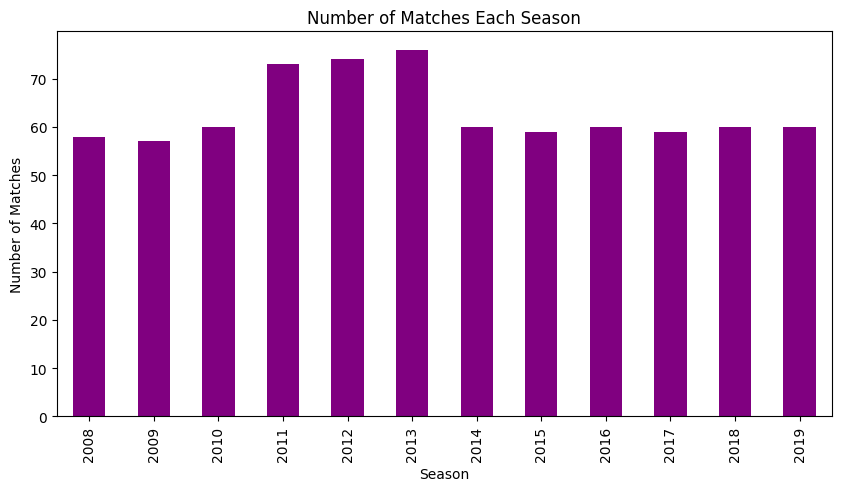

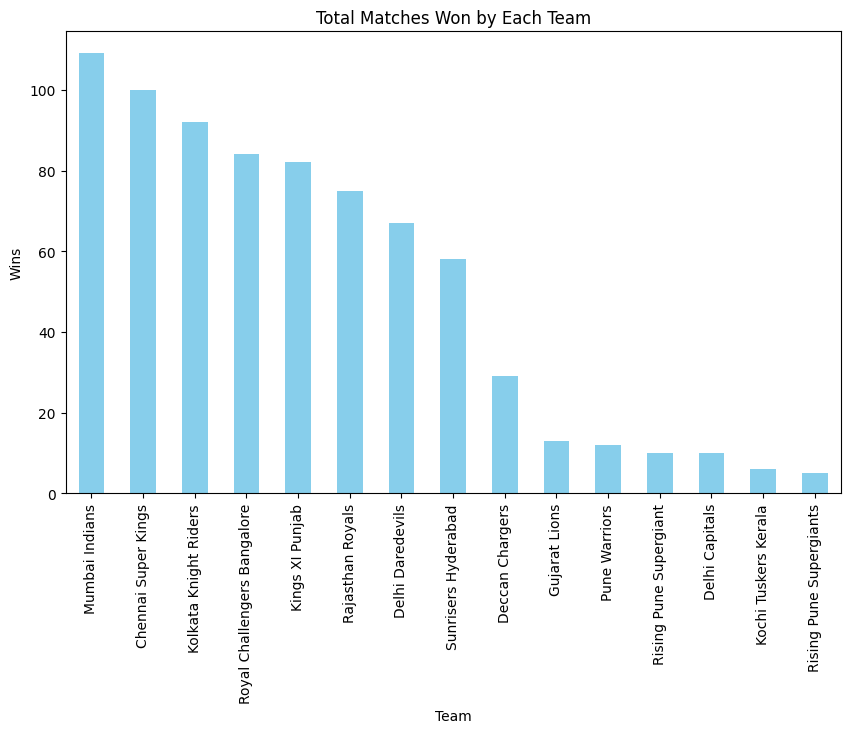

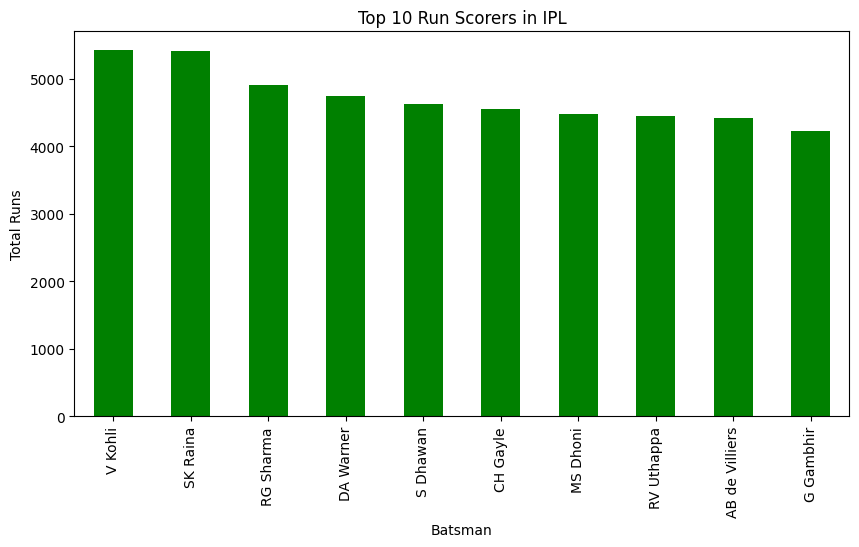

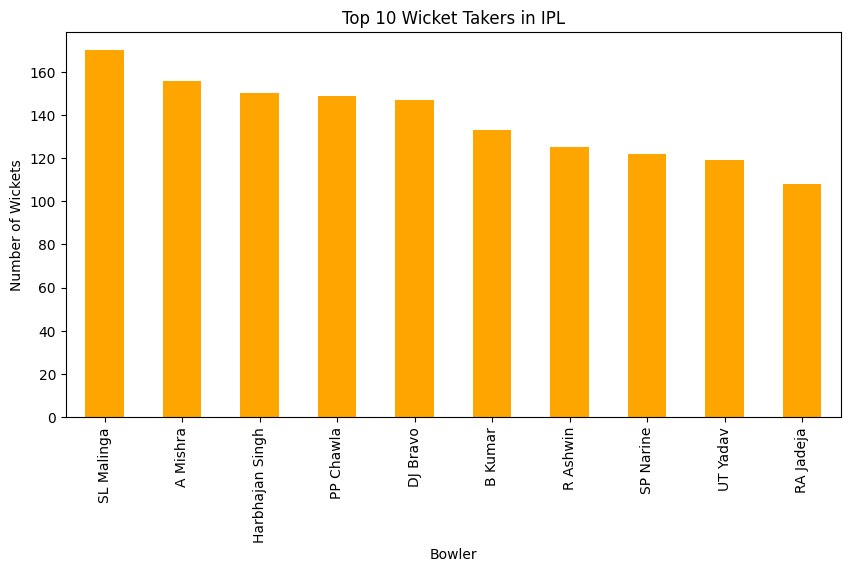

/tmp/ipython-input-3-3863316144.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matches, x='toss_decision', palette='Set2')


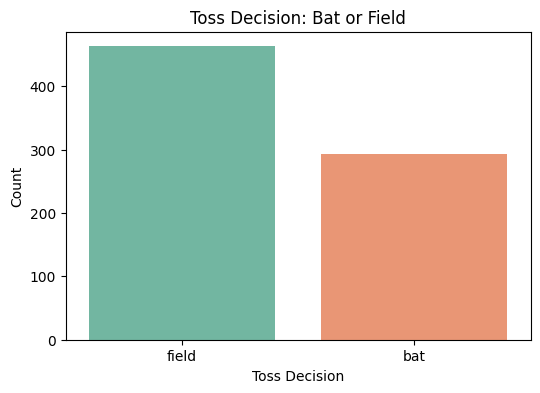

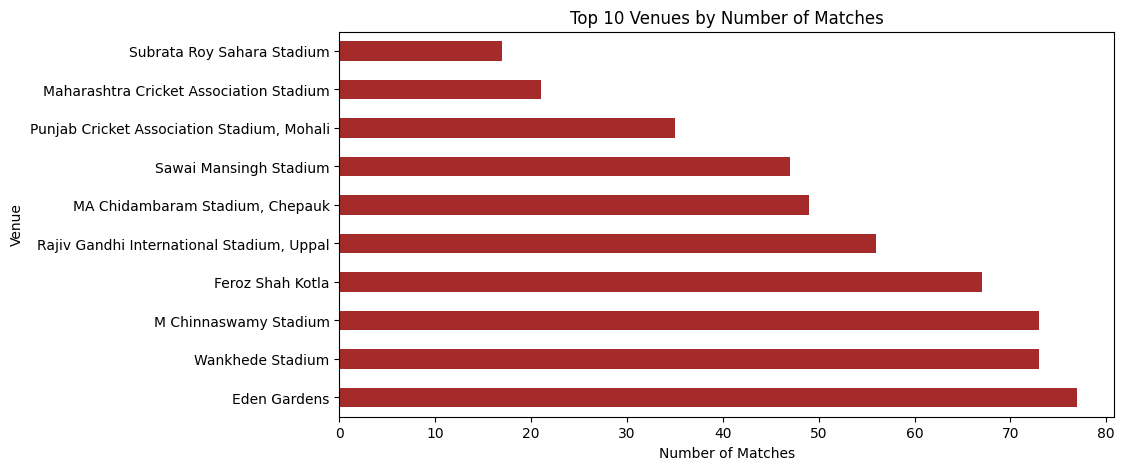

In [3]:
# 📊 IPL Data Analysis — Final Corrected Version

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load the datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# ✅ Convert 'date' to datetime correctly
matches['date'] = pd.to_datetime(matches['date'], dayfirst=True, errors='coerce')

# ✅ Create 'season' column
matches['season'] = matches['date'].dt.year

# ✅ Data Overview
print(matches.head())
print(deliveries.head())

# 🏆 Number of Matches Played Each Season
plt.figure(figsize=(10,5))
matches['season'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Number of Matches Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.show()

# 🏙️ Matches Won by Each Team
plt.figure(figsize=(10,6))
matches['winner'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

# 🏏 Top 10 Run Scorers
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_batsmen.plot(kind='bar', color='green')
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.show()

# 🎯 Top 10 Wicket Takers
# Filter for dismissals that result in wickets
dismissal_types = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket', 'obstructing the field']

wickets = deliveries[deliveries['dismissal_kind'].isin(dismissal_types)]
top_bowlers = wickets.groupby('bowler').count()['dismissal_kind'].sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_bowlers.plot(kind='bar', color='orange')
plt.title('Top 10 Wicket Takers in IPL')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.show()

# 🏟️ Toss Decision Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=matches, x='toss_decision', palette='Set2')
plt.title('Toss Decision: Bat or Field')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

# 🏙️ Most Popular Venues
plt.figure(figsize=(10,5))
matches['venue'].value_counts().head(10).plot(kind='barh', color='brown')
plt.title('Top 10 Venues by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()
